<a href="https://colab.research.google.com/github/heev1001/mutsa-4th-midproject/blob/main/Mid_Project_%EC%99%B8%EB%B6%80%EC%9E%90%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fvQ
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
fc-cache: invalid option -- 'Q'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
edu = pd.read_csv('edu-Data.csv')
grading = pd.read_csv('Students_Grading_Dataset.csv')

In [ ]:
grading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    5000 non-null   object 
 1   First_Name                    5000 non-null   object 
 2   Last_Name                     5000 non-null   object 
 3   Email                         5000 non-null   object 
 4   Gender                        5000 non-null   object 
 5   Age                           5000 non-null   int64  
 6   Department                    5000 non-null   object 
 7   Attendance (%)                5000 non-null   float64
 8   Participation_Score           5000 non-null   float64
 9   Projects_Score                5000 non-null   float64
 10  Total_Score                   5000 non-null   float64
 11  Grade                         5000 non-null   object 
 12  Study_Hours_per_Week          5000 non-null   float64
 13  Ext

In [ ]:
grading['Family_Income_Level'].unique()

array(['Low', 'High'], dtype=object)

In [ ]:
# 부모 학벌 값 변경
edu_level_mapping = {
    'High School' : '고졸',
    'Bachelor\'s' : '대졸',
    'Master\'s' : '석사',
    'PhD' : '박사'
}

grading['Parent_Education_Level'] = grading['Parent_Education_Level'].map(edu_level_mapping)
grading['Parent_Education_Level'] = grading['Parent_Education_Level'].replace(np.nan, '중졸이하')
grading['Parent_Education_Level'].unique()

array(['고졸', '중졸이하', '석사', '박사', '대졸'], dtype=object)

nan : 중학교 졸업 이하<br>
High School : 고등학교 졸업<br>
Bachelor's : 대학교 졸업<br>
Master's : 석사 졸업<br>
PhD : 박사 졸업

In [ ]:
grading['Grade'].unique()

array(['F', 'A', 'D', 'B', 'C'], dtype=object)

In [ ]:
grading['Department'].unique()

array(['Engineering', 'Business', 'Mathematics', 'CS'], dtype=object)

In [ ]:
# 컬럼 이름 변경 및 범위 설정

grading = grading.rename(columns={'Grade' : 'Class', 'Parent_Education_Level': '부모_학벌', 'Family_Income_Level': '부모_재정'})

conditions = [
    (grading['Total_Score'] >= 0) & (grading['Total_Score'] <= 69),
    (grading['Total_Score'] >= 70) & (grading['Total_Score'] <= 89),
    (grading['Total_Score'] >= 90) & (grading['Total_Score'] <= 100)
]

choices = ['L', 'M', 'H']

grading['Class'] = np.select(conditions, choices, default='L')

In [ ]:
grading['Class'].unique()

array(['L', 'M', 'H'], dtype=object)

In [ ]:
grading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    5000 non-null   object 
 1   First_Name                    5000 non-null   object 
 2   Last_Name                     5000 non-null   object 
 3   Email                         5000 non-null   object 
 4   Gender                        5000 non-null   object 
 5   Age                           5000 non-null   int64  
 6   Department                    5000 non-null   object 
 7   Attendance (%)                5000 non-null   float64
 8   Participation_Score           5000 non-null   float64
 9   Projects_Score                5000 non-null   float64
 10  Total_Score                   5000 non-null   float64
 11  Class                         5000 non-null   object 
 12  Study_Hours_per_Week          5000 non-null   float64
 13  Ext

In [ ]:
grading['부모_학벌'].value_counts()

,count
부모_학벌,
중졸이하,1794
박사,820
대졸,810
고졸,796
석사,780


In [ ]:
grading['부모_재정'].value_counts()

,count
부모_재정,
High,2642
Low,2358


In [ ]:
grading['Total_Score'].min()

50.02



---



# 외부 데이터



---



# 가설 1 - 학부모의 학벌이 높을 수록 성적이 높을 것이다.

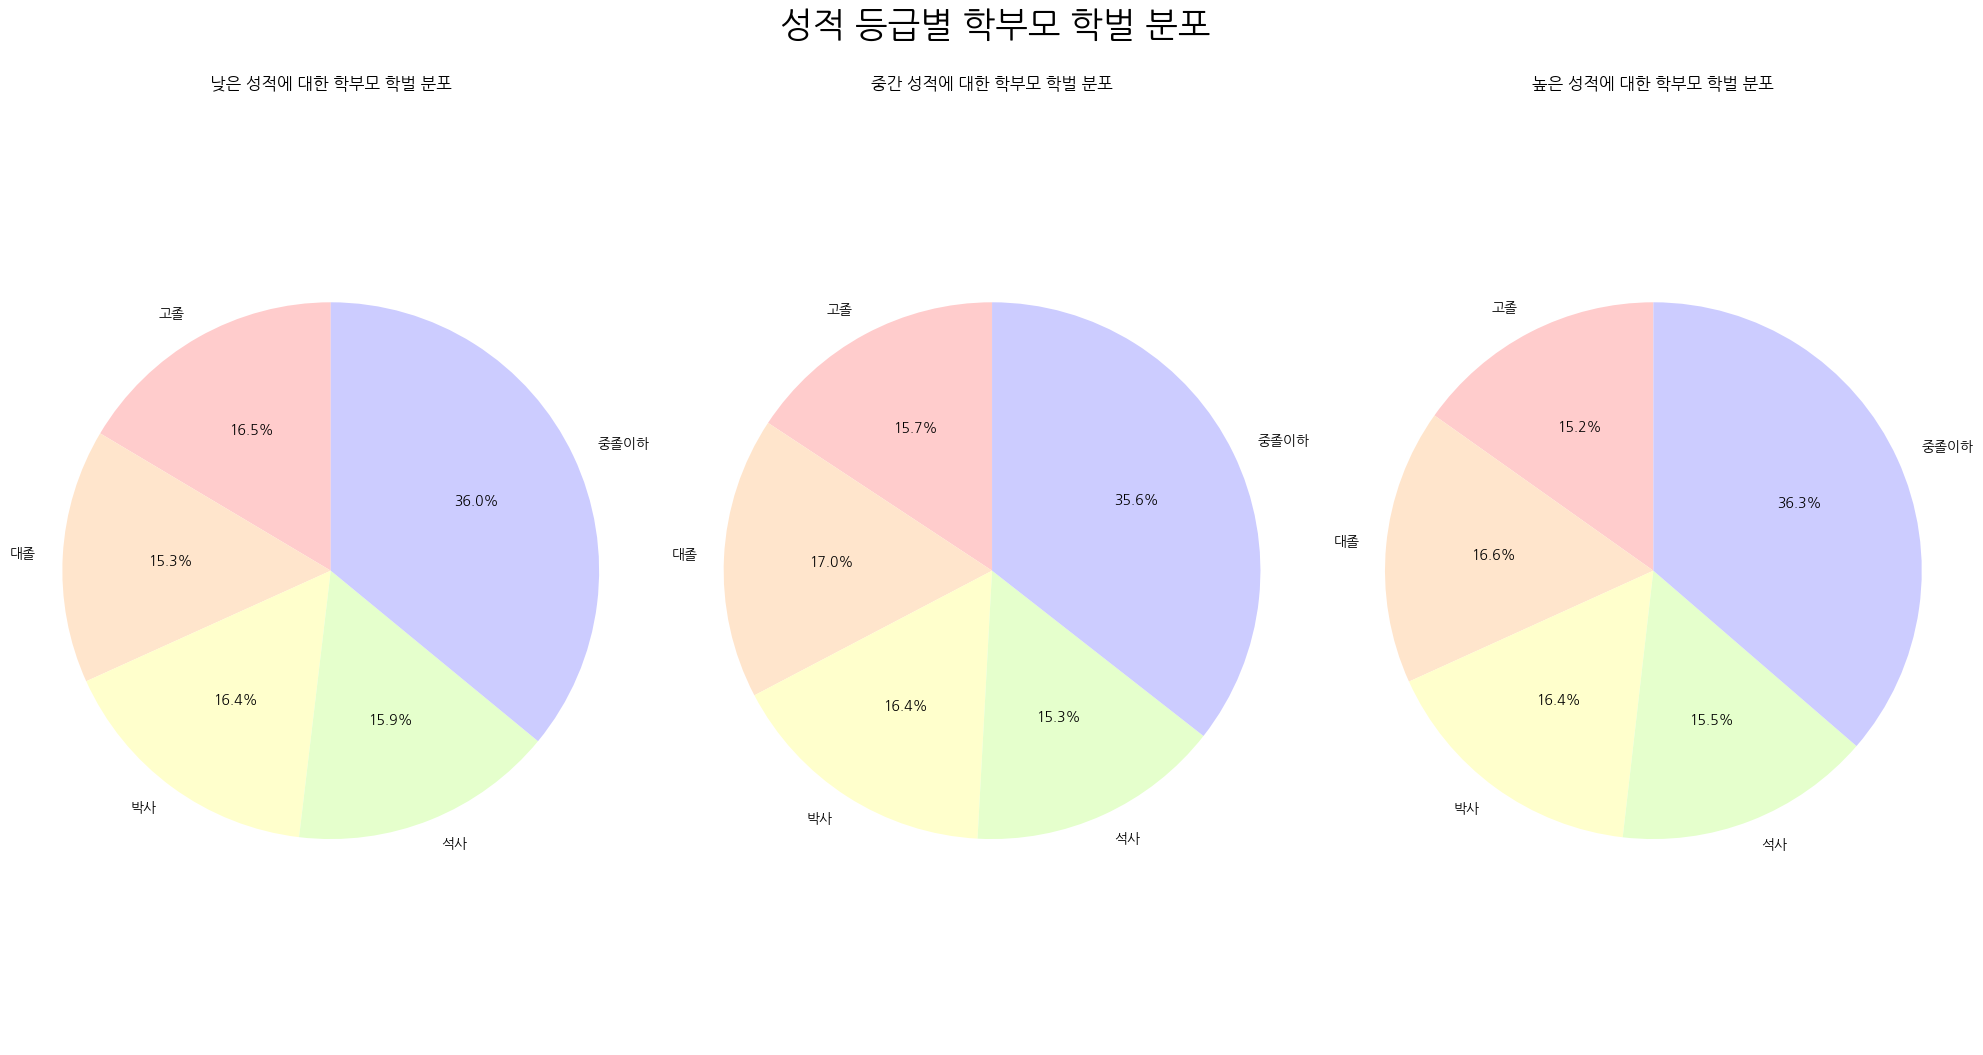

<Figure size 1200x600 with 0 Axes>

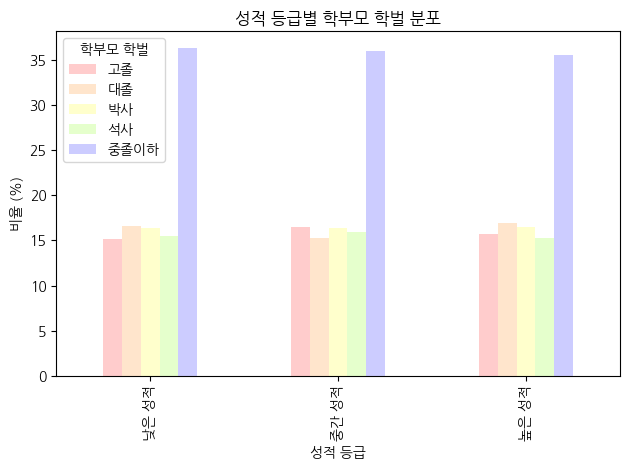

In [ ]:
# 학부모 학벌 조사와 성적 클래스에 따른 파이차트 생성
parentLevel_by_class = pd.crosstab([grading['부모_학벌']], grading['Class'])
parentLevel_by_class.columns = ['L', 'M', 'H']

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

classes = ['L', 'M', 'H']
class_labels = {'L': '낮은 성적', 'M': '중간 성적', 'H': '높은 성적'}
colors = ['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC', '#CCCCFF']

for i, cls in enumerate(classes):
    class_data = grading[grading['Class'] == cls]

    value_counts = class_data['부모_학벌'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
    )

    ax[i].set_title(f"{class_labels[cls]}에 대한 학부모 학벌 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('성적 등급별 학부모 학벌 분포', fontsize=25, y=1.05)
plt.savefig('relation_by_class_piechart.png', dpi=300, bbox_inches='tight')
plt.show()

# 막대 차트로 확인
parentLevel_by_class = pd.crosstab(grading['Class'], grading['부모_학벌'], normalize='index') * 100

plt.figure(figsize=(12, 6))
parentLevel_by_class.plot(kind='bar', color=['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC', '#CCCCFF'])

plt.title('성적 등급별 학부모 학벌 분포')
plt.xlabel('성적 등급')
plt.ylabel('비율 (%)')
plt.legend(title='학부모 학벌')
plt.xticks(range(3), ['낮은 성적', '중간 성적', '높은 성적'])
plt.tight_layout()
plt.savefig('relation_by_class_barchart_reversed.png', dpi=300)
plt.show()

# 가설 1은 차이가 없었다

# 가설 2 - 학부모의 재정이 좋을수록 성적이 높을 것이다.

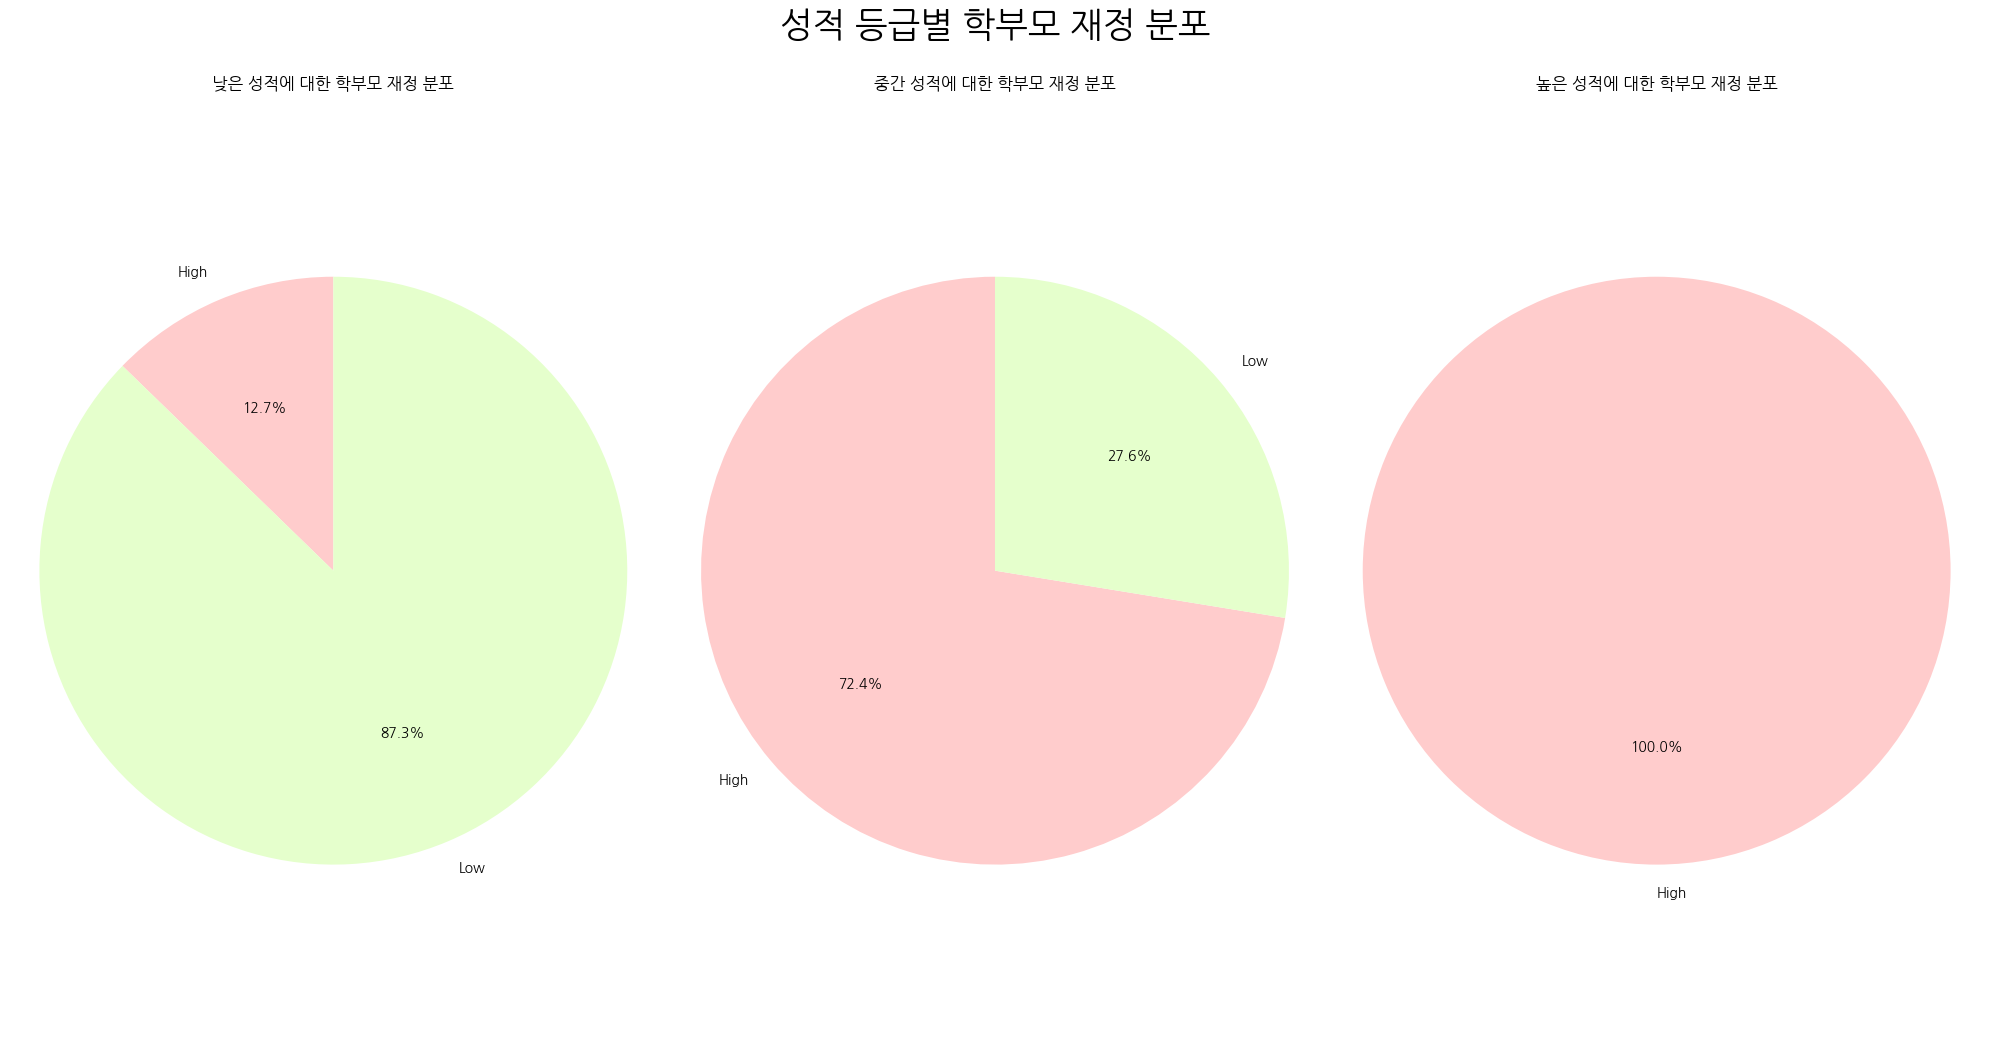

In [ ]:
# 학부모 재정 조사와 성적 클래스에 따른 파이차트 생성
parentLevel_by_class = pd.crosstab([grading['부모_재정']], grading['Class'])
parentLevel_by_class.columns = ['L', 'M', 'H']

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

classes = ['L', 'M', 'H']
class_labels = {'L': '낮은 성적', 'M': '중간 성적', 'H': '높은 성적'}
colors = ['#FFCCCC', '#E5FFCC']

for i, cls in enumerate(classes):
    class_data = grading[grading['Class'] == cls]

    value_counts = class_data['부모_재정'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
    )

    ax[i].set_title(f"{class_labels[cls]}에 대한 학부모 재정 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('성적 등급별 학부모 재정 분포', fontsize=25, y=1.05)
plt.savefig('relation_by_class_piechart.png', dpi=300, bbox_inches='tight')
plt.show()



# 경제 상황이 좋으면 높은 성적을 받는 경향이 있다

# 가설 3 - 학부모의 학벌이 좋고 재정이 좋을수록 성적이 높을 것이다.

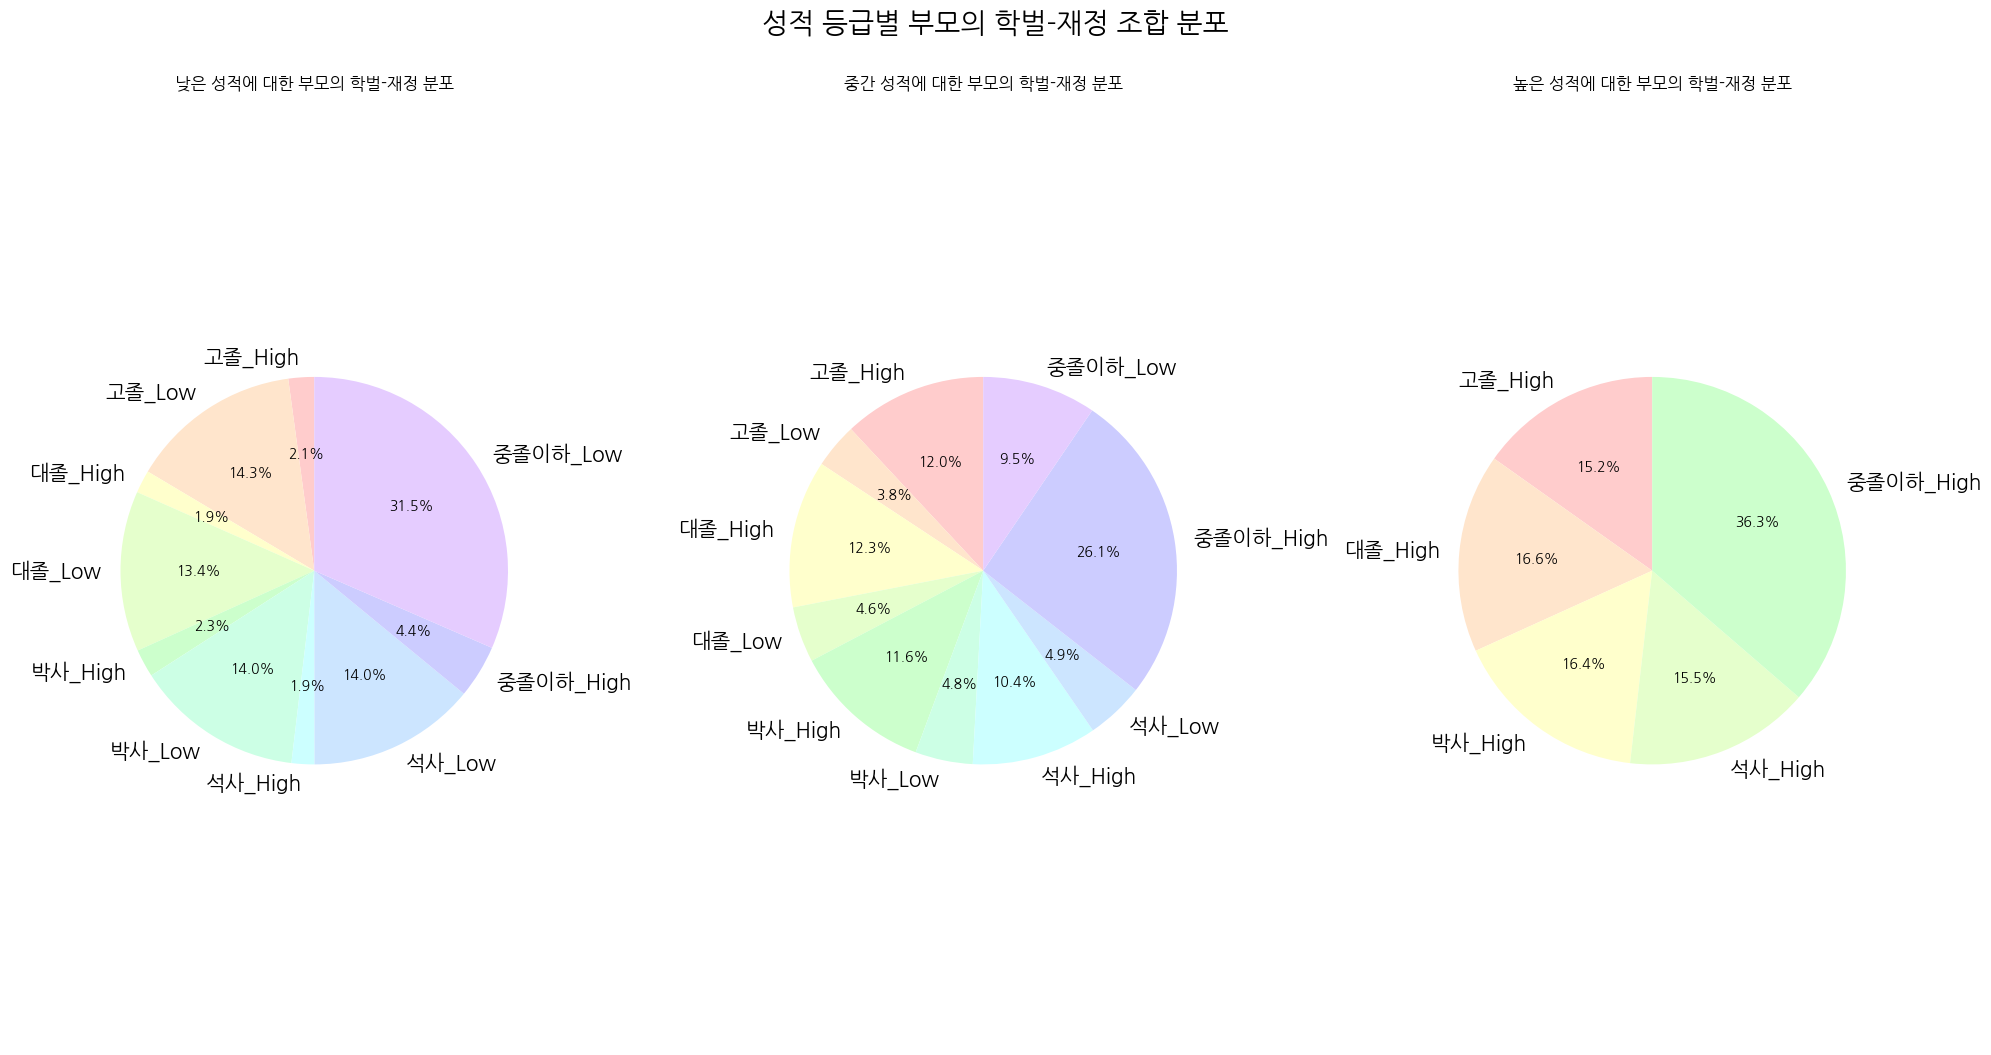

In [ ]:
# 성적에 대한 부모의 학력과 재정 상황
class_by_Education_Income = pd.crosstab([grading['부모_학벌'], grading['부모_재정']], grading['Class'])
class_by_Education_Income.columns = ['L', 'M', 'H']  # 낮음, 중간, 높음

# 이번에는 반대로 각 성적 그룹별로성적에 대한 부모의 학력과 재정 분포를 보여주는 파이차트 생성
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# 학벌-재정 조합을 위한 새로운 변수 생성
grading['education_income'] = grading['부모_학벌'] + '_' + grading['부모_재정']

# 학벌-재정 조합에 대한 레이블 생성
education_income_labels = {
    '박사_High': '박사_High',
    '박사_Low': '박사_Low',
    '석사_High': '석사_High',
    '석사_Low': '석사_Low',
    '대졸_High': '대졸_High',
    '대졸_Low': '대졸_Low',
    '고졸_High': '고졸_High',
    '고졸_Low': '고졸_Low',
    '중졸이하_High': '중졸이하_High',
    '중졸이하_Low': '중졸이하_Low',
}

# 학벌-재정 조합 구간화
grading['education_income_bin'] = grading['education_income'].map(education_income_labels)

classes = ['L', 'M', 'H']
class_labels = {'L': '낮은 성적', 'M': '중간 성적', 'H': '높은 성적'}
colors = [
  '#FFCCCC',  # 연한 분홍색
  '#FFE5CC',  # 연한 살구색
  '#FFFFCC',  # 연한 노란색
  '#E5FFCC',  # 연한 라임색
  '#CCFFCC',  # 연한 민트색
  '#CCFFE5',  # 연한 청록색
  '#CCFFFF',  # 연한 하늘색
  '#CCE5FF',  # 연한 파란색
  '#CCCCFF',  # 연한 라벤더색
  '#E5CCFF'   # 연한 보라색
]

for i, cls in enumerate(classes):
    class_data = grading[grading['Class'] == cls]

    # 각 성적 그룹 내 부모의 학벌-재정 분포
    value_counts = class_data['education_income_bin'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )

    # 텍스트 크기 조정 (레이블이 길 수 있음)
    for text in texts:
        text.set_fontsize(15)

    ax[i].set_title(f"{class_labels[cls]}에 대한 부모의 학벌-재정 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('성적 등급별 부모의 학벌-재정 조합 분포', fontsize=20, y=1.05)
plt.savefig('class_by_absence_satisfaction_piechart.png', dpi=300, bbox_inches='tight')
plt.show()

가설 3도 의미 없었다.

한글 폰트 정상 작동
상관관계: 
               Education_num  Income_num  Class_Numeric
Education_num       1.000000   -0.007268       0.001129
Income_num         -0.007268    1.000000       0.694922
Class_Numeric       0.001129    0.694922       1.000000


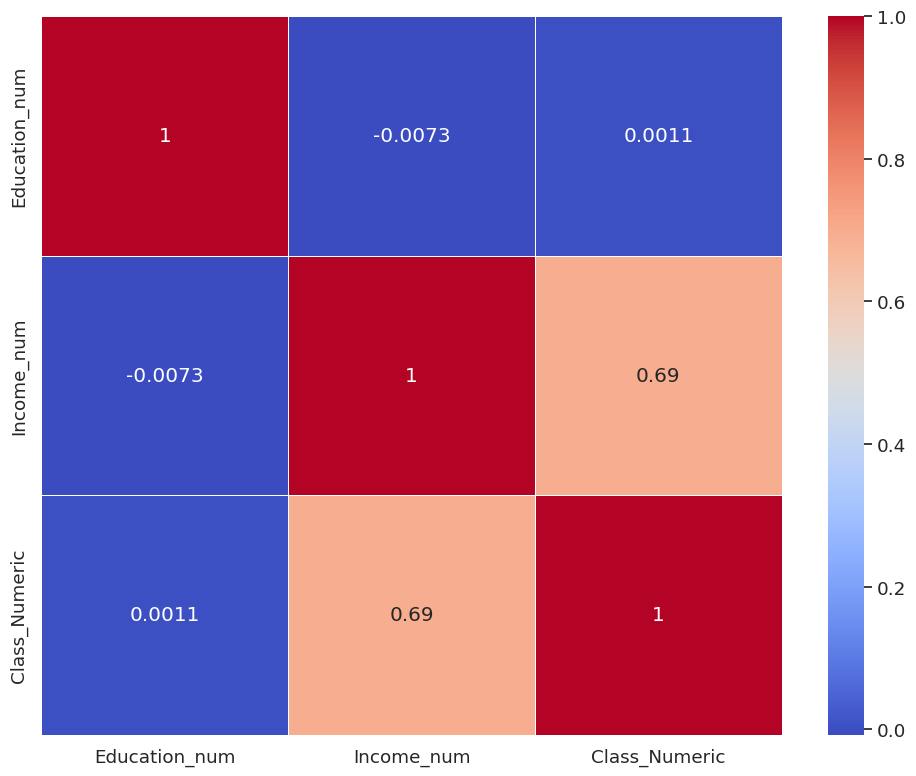

In [ ]:
try:
    plt.text(0.5, 0.5, '한글 테스트', fontsize=20)
    plt.savefig('korean_test.png')
    print("한글 폰트 정상 작동")
except:
    print("한글 폰트 로딩 실패")

plt.close()

education_mapping = {
    '중졸이하' : 0,
    '고졸' : 1,
    '대졸' : 2,
    '석사' : 3,
    '박사' : 4,
}

grading['Education_num'] = grading['부모_학벌'].map(education_mapping)

imcome_mapping = {
    "Low" : 0,
    "Medium": 1,
    "High" : 2
}

grading['Income_num'] = grading['부모_재정'].map(imcome_mapping)

class_mapping = {
    'L': 0,
    'M': 1,
    'H': 2
}
grading['Class_Numeric'] = grading['Class'].map(class_mapping)

variables = ['Education_num', 'Income_num', 'Class_Numeric']
corr_df = grading[variables]

corr_matrix = corr_df.corr()
print("상관관계: ")
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.tight_layout()
plt.savefig('education_income_class_heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
grading['Country'].value_counts()

,count
Country,
Japan,1476
Canada,1042
US,1005
France,804
Australia,673


# 경제 재정에 따른 부모의 학벌 차이

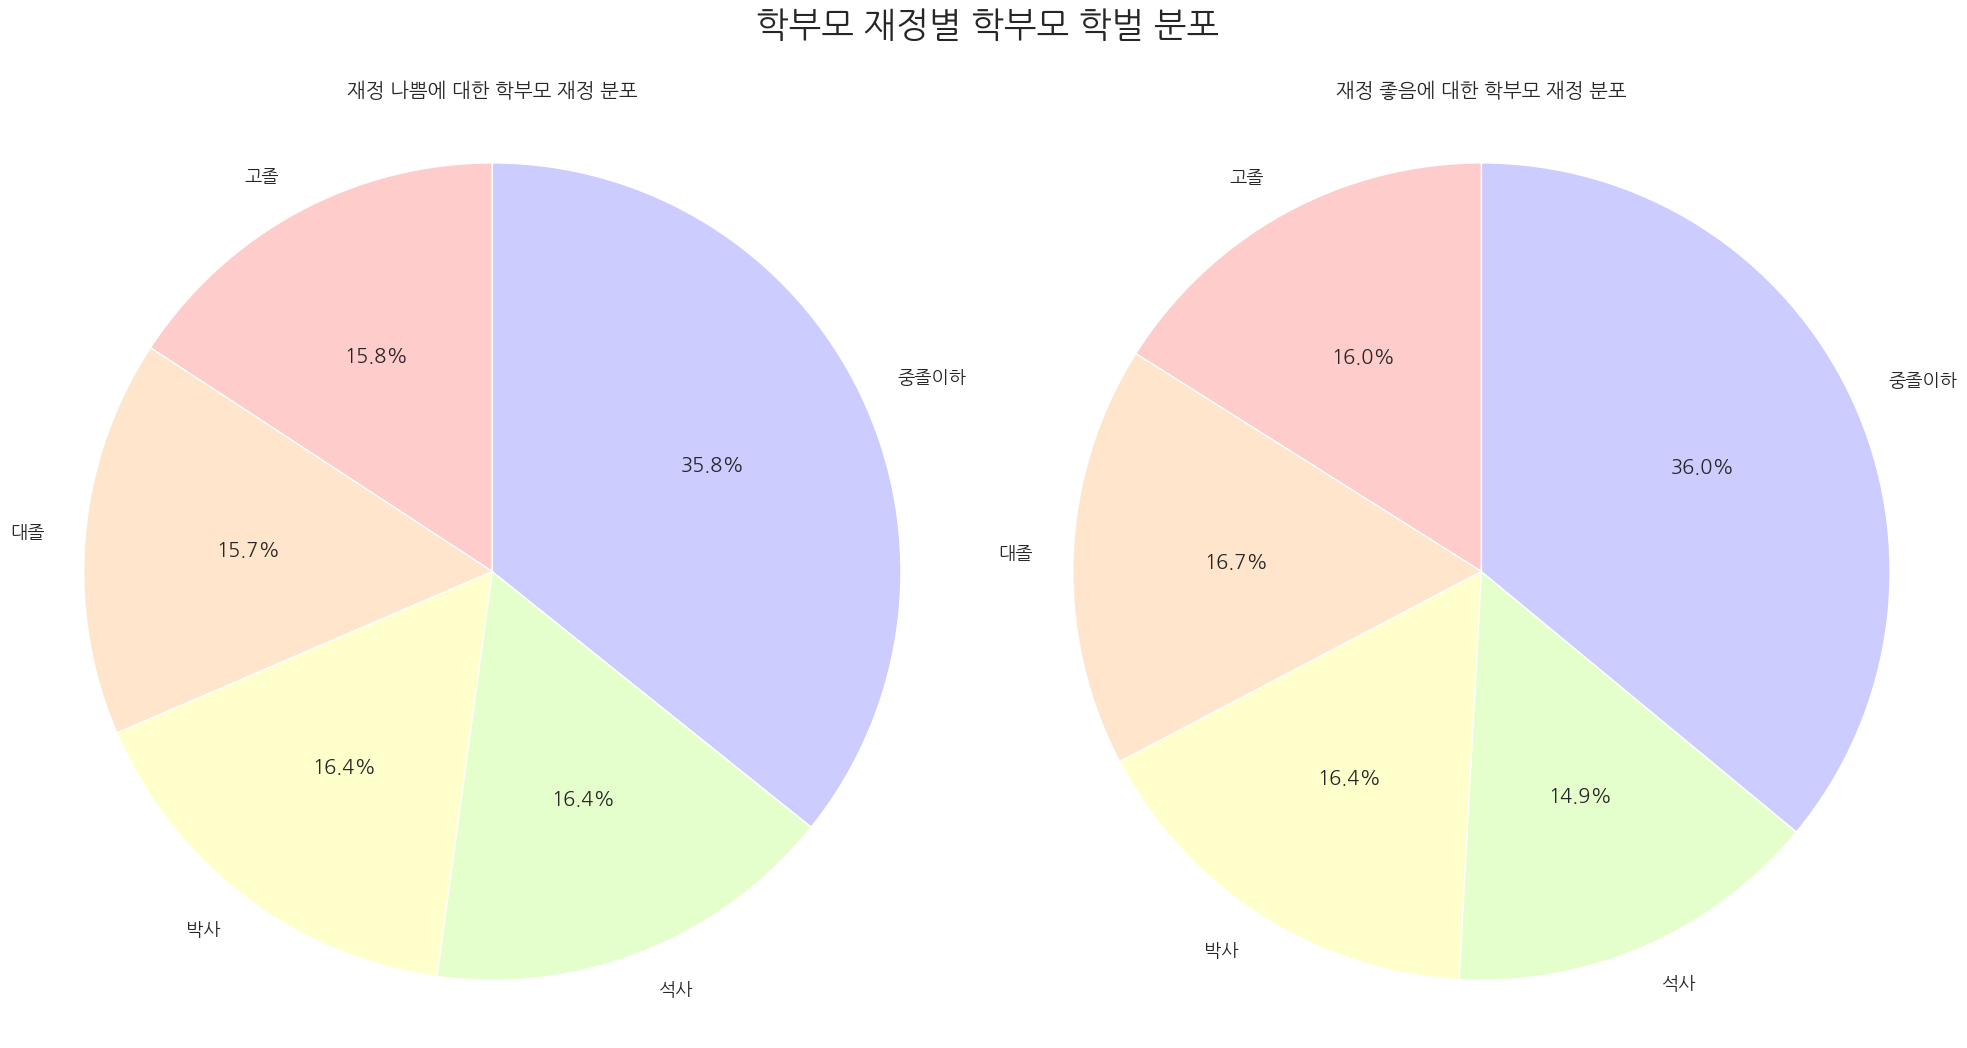

In [ ]:
# 학부모 학벌 조사와 성적 클래스에 따른 파이차트 생성
import pandas as pd
import matplotlib.pyplot as plt

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

parentLevel_by_parentIncome = pd.crosstab([grading['부모_학벌']], grading['부모_재정'])
parentLevel_by_parentIncome.columns = ['Low', 'High']

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

classes = ['Low','High']
class_labels = {'Low': '재정 나쁨', 'High': '재정 좋음'}
colors = ['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC', '#CCCCFF']

for i, cls in enumerate(classes):
    class_data = grading[grading['부모_재정'] == cls]

    value_counts = class_data['부모_학벌'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
    )


    ax[i].set_title(f"{class_labels[cls]}에 대한 학부모 재정 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('학부모 재정별 학부모 학벌 분포', fontsize=25, y=1.05)
plt.savefig('parentLevel_by_parentIncome_piechart.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
grading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    5000 non-null   object 
 1   First_Name                    5000 non-null   object 
 2   Last_Name                     5000 non-null   object 
 3   Email                         5000 non-null   object 
 4   Gender                        5000 non-null   object 
 5   Age                           5000 non-null   int64  
 6   Department                    5000 non-null   object 
 7   Attendance (%)                5000 non-null   float64
 8   Participation_Score           5000 non-null   float64
 9   Projects_Score                5000 non-null   float64
 10  Total_Score                   5000 non-null   float64
 11  Class                         5000 non-null   object 
 12  Study_Hours_per_Week          5000 non-null   float64
 13  Ext

# 가설 4 - 집에 인터넷이 설치 되어있으면 성적이 높을것이다.

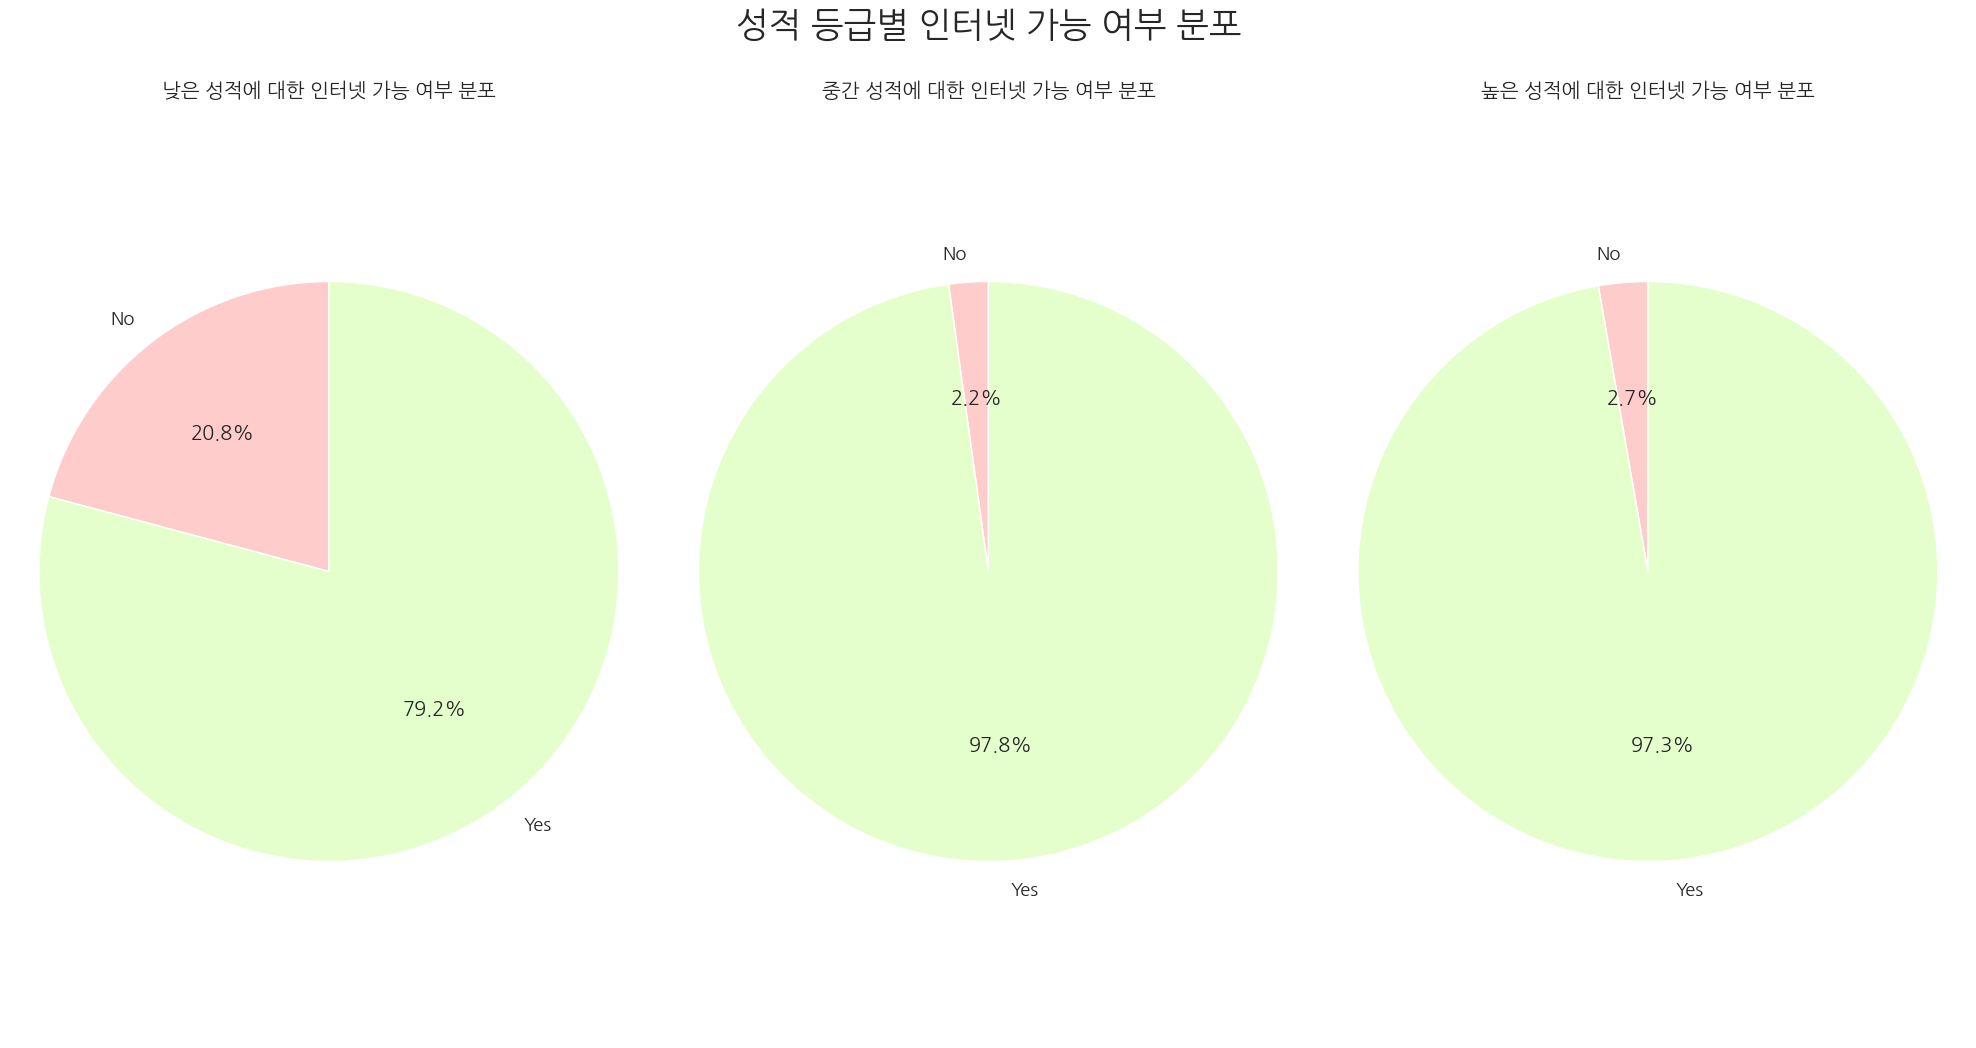

In [ ]:
# 인터넷 가능여부와 성적 클래스에 따른 파이차트 생성

grading = grading.rename(columns={'Internet_Access_at_Home': '인터넷_가능여부'})
internetAccess_by_class = pd.crosstab([grading['인터넷_가능여부']], grading['Class'])
internetAccess_by_class.columns = ['L', 'M', 'H']

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

classes = ['L', 'M', 'H']
class_labels = {'L': '낮은 성적', 'M': '중간 성적', 'H': '높은 성적'}
colors = ['#FFCCCC', '#E5FFCC']

for i, cls in enumerate(classes):
    class_data = grading[grading['Class'] == cls]

    value_counts = class_data['인터넷_가능여부'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
    )

    ax[i].set_title(f"{class_labels[cls]}에 대한 인터넷 가능 여부 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('성적 등급별 인터넷 가능 여부 분포', fontsize=25, y=1.05)
plt.savefig('internetAccess_by_class_piechart.png', dpi=300, bbox_inches='tight')
plt.show()



인터넷이 설치되어있으면, 성적이 늘어나는 것을 알 수 있다

재정별 인터넷 설치

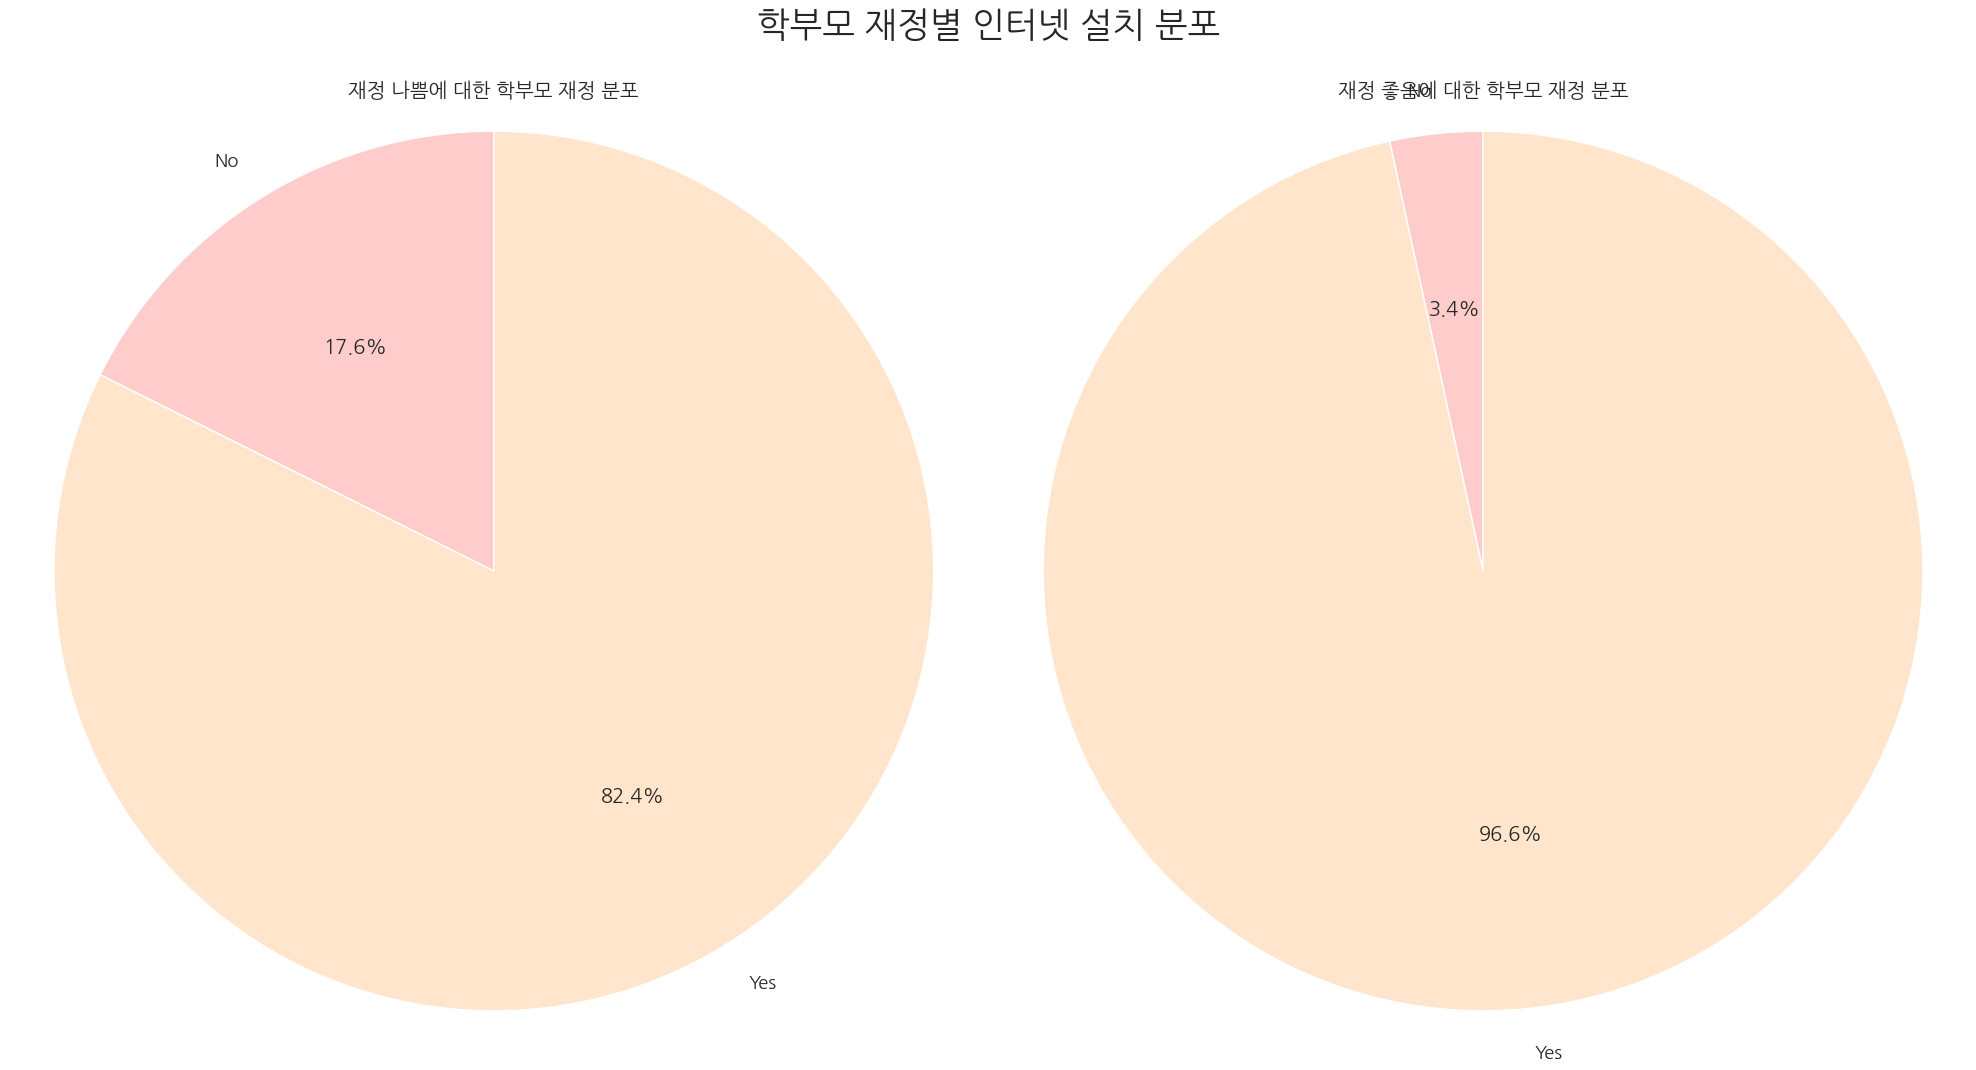

In [ ]:
# 학부모 재정에 따른 인터넷 설치 파이차트 생성
import pandas as pd
import matplotlib.pyplot as plt

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

internetAccess_by_income = pd.crosstab([grading['인터넷_가능여부']], grading['부모_재정'])
internetAccess_by_income.columns = ['Low', 'High']

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

classes = ['Low','High']
class_labels = {'Low': '재정 나쁨', 'High': '재정 좋음'}
colors = ['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC']

for i, cls in enumerate(classes):
    class_data = grading[grading['부모_재정'] == cls]

    value_counts = class_data['인터넷_가능여부'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
    )


    ax[i].set_title(f"{class_labels[cls]}에 대한 학부모 재정 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('학부모 재정별 인터넷 설치 분포', fontsize=25, y=1.05)
plt.savefig('internetAccess_by_income_piechart.png', dpi=300, bbox_inches='tight')
plt.show()



# 가설 5 - 학부모의 재정이 좋고 집에 인터넷이 설치되어있으면 성적이 높을 것이다.

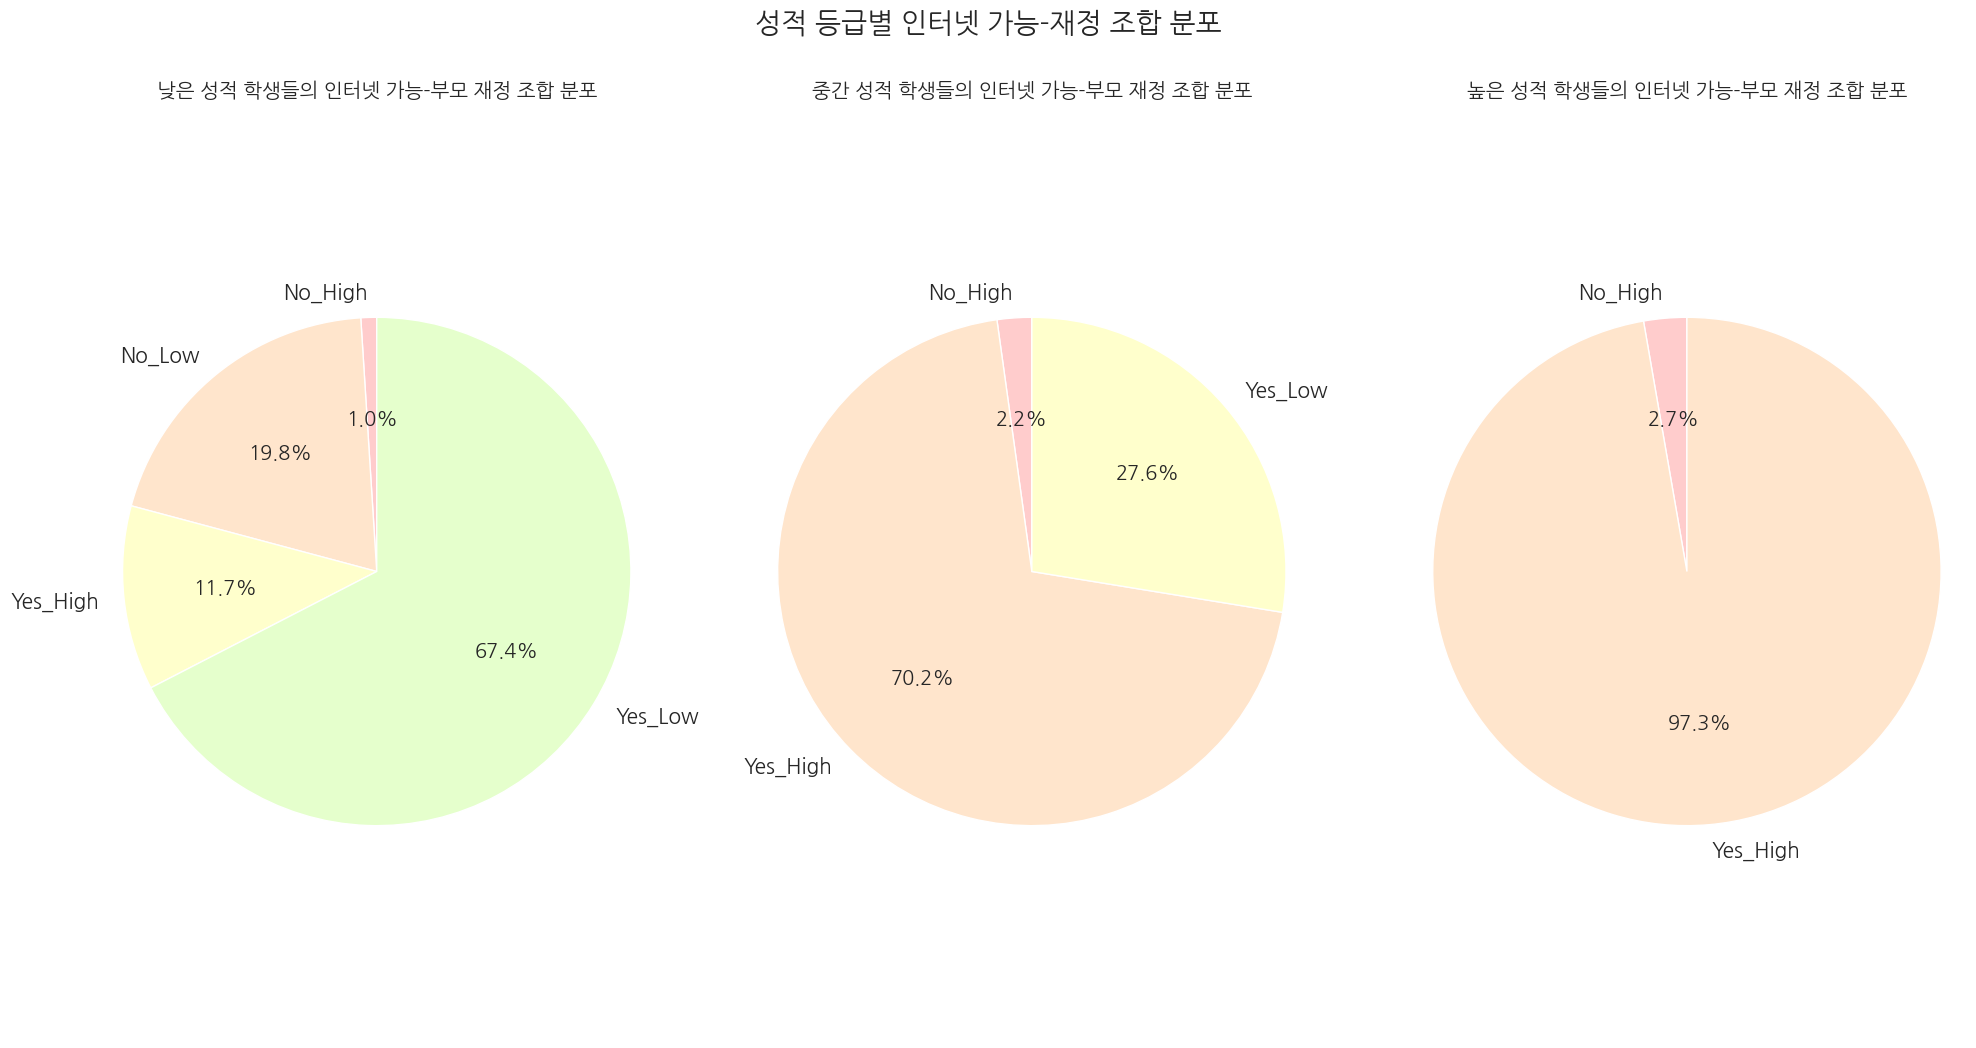

                   L     M    H
인터넷_가능여부 부모_재정                 
No       High     21    42   27
         Low     416     0    0
Yes      High    246  1345  961
         Low    1414   528    0


<Figure size 1200x600 with 0 Axes>

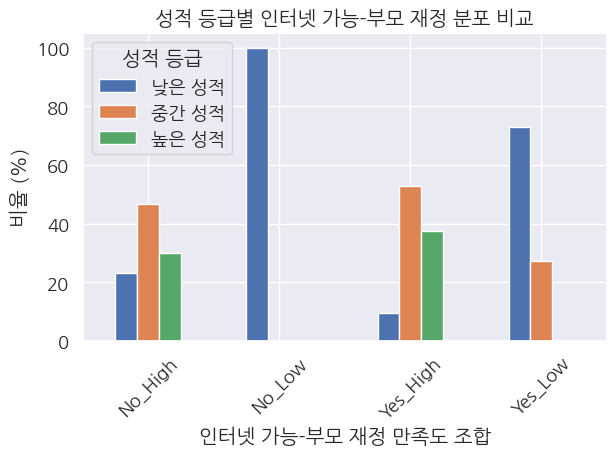

In [ ]:
# 인터넷 가능과 부모 재정의 조합을 살펴보고, 각 조합별로 성적 분포 파이차트 생성
class_by_internet_income = pd.crosstab([grading['인터넷_가능여부'], grading['부모_재정']], grading['Class'])
class_by_internet_income = class_by_internet_income[['L', 'M', 'H']]  # 열 순서 (L, M , H 순으로)
class_by_internet_income.columns = ['L', 'M', 'H']  # 낮음, 중간, 높음

# 이번에는 반대로 각 성적 그룹별로 인터넷 가능-재정 조합 분포를 보여주는 파이차트 생성
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# 인터넷 가능-재정 조합을 위한 새로운 변수 생성
grading['internet_income'] = grading['인터넷_가능여부'] + '_' + grading['부모_재정']

# 인터넷 가능-재정 조합에 대한 레이블 생성
absence_satisfaction_labels = {
    'Yes_High': 'Yes_High',
    'Yes_Low': 'Yes_Low',
    'No_High': 'No_High',
    'No_Low': 'No_Low'
}

# 인터넷 가능-재정 조합 구간화
grading['internet_income_bin'] = grading['internet_income'].map(absence_satisfaction_labels)

classes = ['L', 'M', 'H']
class_labels = {'L': '낮은 성적', 'M': '중간 성적', 'H': '높은 성적'}
colors = ['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC']

for i, cls in enumerate(classes):
    class_data = grading[grading['Class'] == cls]

    # 각 성적 그룹 내 인터넷 가능-재정 조합 분포
    value_counts = class_data['internet_income_bin'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )

    # 텍스트 크기 조정 (레이블이 길 수 있음)
    for text in texts:
        text.set_fontsize(15)

    ax[i].set_title(f"{class_labels[cls]} 학생들의 인터넷 가능-부모 재정 조합 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('성적 등급별 인터넷 가능-재정 조합 분포', fontsize=20, y=1.05)
plt.savefig('class_by_internet_income_piechart.png', dpi=300, bbox_inches='tight')
plt.show()
print(class_by_internet_income)

# 막대 그래프로 비교하기
plt.figure(figsize=(12, 6))
absence_class_crosstab = pd.crosstab(grading['internet_income_bin'], grading['Class'], normalize='index') * 100
absence_class_crosstab = absence_class_crosstab[['L', 'M', 'H']]  # 열 순서 (L, M , H 순으로)
absence_class_crosstab.plot(kind='bar', stacked=False)
plt.title('성적 등급별 인터넷 가능-부모 재정 분포 비교')
plt.xlabel('인터넷 가능-부모 재정 만족도 조합')
plt.ylabel('비율 (%)')
plt.legend(title='성적 등급', labels=class_labels.values())
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_by_internet_income_barplot.png', dpi=300)
plt.show()

# 재정이 좋고 인터넷이 설치되어있으면 성적이 좋아진다
### **(추후 과제에 "저소득층 가정 학생들에게" 라고 조건을 넣게 된 이유)**
### (* 소득 수준은 높지만, 인터넷이 없는 학생들 중 약 30%가 상위권이기 때문)

In [ ]:
grading.to_csv('grading.csv', index=False, encoding='utf-8')



---



# 내부 데이터

In [ ]:
edu = pd.read_csv('edu-Data.csv')
edu = edu.rename(columns={'VisITedResources': '콘텐츠_방문', 'ParentAnsweringSurvey': '학부모_설문답변', 'ParentschoolSatisfaction':'학부모_만족도'})
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              480 non-null    object
 1   NationalITy         480 non-null    object
 2   PlaceofBirth        480 non-null    object
 3   StageID             480 non-null    object
 4   GradeID             480 non-null    object
 5   SectionID           480 non-null    object
 6   Topic               480 non-null    object
 7   Semester            480 non-null    object
 8   Relation            480 non-null    object
 9   raisedhands         480 non-null    int64 
 10  콘텐츠_방문              480 non-null    int64 
 11  AnnouncementsView   480 non-null    int64 
 12  Discussion          480 non-null    int64 
 13  학부모_설문답변            480 non-null    object
 14  학부모_만족도             480 non-null    object
 15  StudentAbsenceDays  480 non-null    object
 16  Class               480 no

## 성적 등급별 인터넷 컨텐츠 방문 횟수

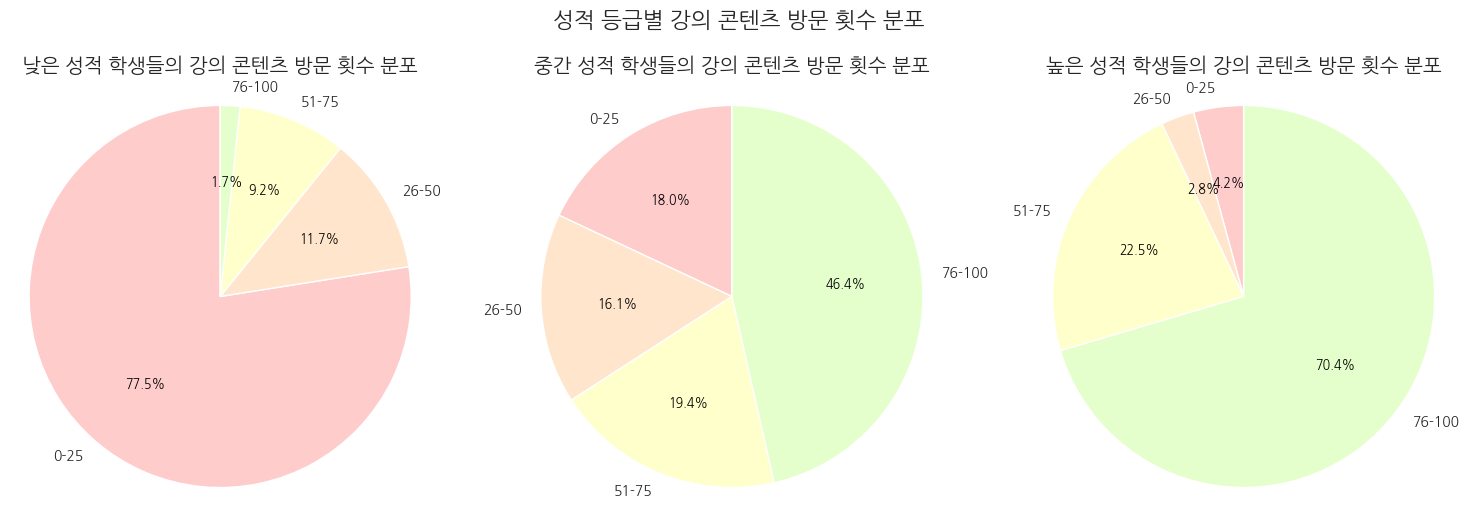

<Figure size 1200x600 with 0 Axes>

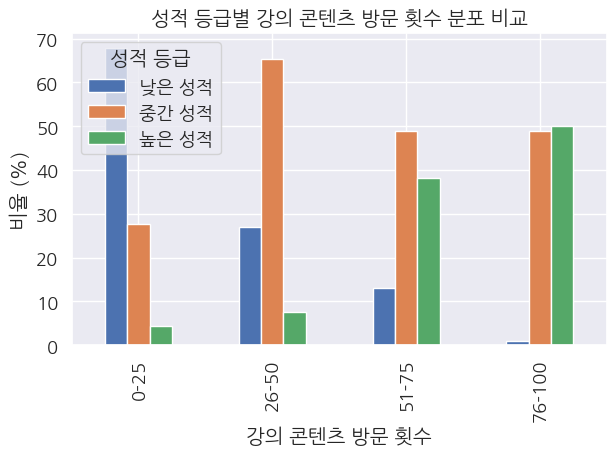

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 방문 자료 수를 구간으로 나누기
bins = [0, 25, 50, 75, 100]
bin_labels = ['0-25', '26-50', '51-75', '76-100']



edu['visited_bin'] = pd.cut(edu['콘텐츠_방문'], bins=bins, labels=bin_labels)

# 각 성적 등급(L, M, H)별로 방문 자료 수 분포를 파이차트로 표시
classes = ['L', 'M', 'H']
class_labels = {'L': '낮은 성적', 'M': '중간 성적', 'H': '높은 성적'}
colors = ['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, cls in enumerate(classes):
    class_data = edu[edu['Class'] == cls]

    # VisITedResources_bin 열의 값 개수 계산 (인덱스 정렬)
    value_counts = class_data['visited_bin'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )

    # 텍스트 크기 조정
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_color('black')

    ax[i].set_title(f"{class_labels[cls]} 학생들의 강의 콘텐츠 방문 횟수 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('성적 등급별 강의 콘텐츠 방문 횟수 분포', fontsize=16, y=1.05)
plt.savefig('visited_by_class_piechart.png', dpi=300, bbox_inches='tight')
plt.show()

# 막대 그래프로 비교하기
plt.figure(figsize=(12, 6))
visited_class_crosstab = pd.crosstab(edu['visited_bin'], edu['Class'], normalize='index') * 100
Visited_class_crosstab = visited_class_crosstab[['L', 'M', 'H']]  # 열 순서 (L, M , H 순으로)
Visited_class_crosstab.plot(kind='bar', stacked=False)
plt.title('성적 등급별 강의 콘텐츠 방문 횟수 분포 비교')
plt.xlabel('강의 콘텐츠 방문 횟수')
plt.ylabel('비율 (%)')
plt.legend(title='성적 등급', labels=class_labels.values())
plt.tight_layout()
plt.savefig('visited_by_class_barplot.png', dpi=300)
plt.show()

In [ ]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   gender              480 non-null    object  
 1   NationalITy         480 non-null    object  
 2   PlaceofBirth        480 non-null    object  
 3   StageID             480 non-null    object  
 4   GradeID             480 non-null    object  
 5   SectionID           480 non-null    object  
 6   Topic               480 non-null    object  
 7   Semester            480 non-null    object  
 8   Relation            480 non-null    object  
 9   raisedhands         480 non-null    int64   
 10  콘텐츠_방문              480 non-null    int64   
 11  AnnouncementsView   480 non-null    int64   
 12  Discussion          480 non-null    int64   
 13  학부모_설문답변            480 non-null    object  
 14  학부모_만족도             480 non-null    object  
 15  StudentAbsenceDays  480 non-null    obje

# 부모 관계와 만족도의 조합

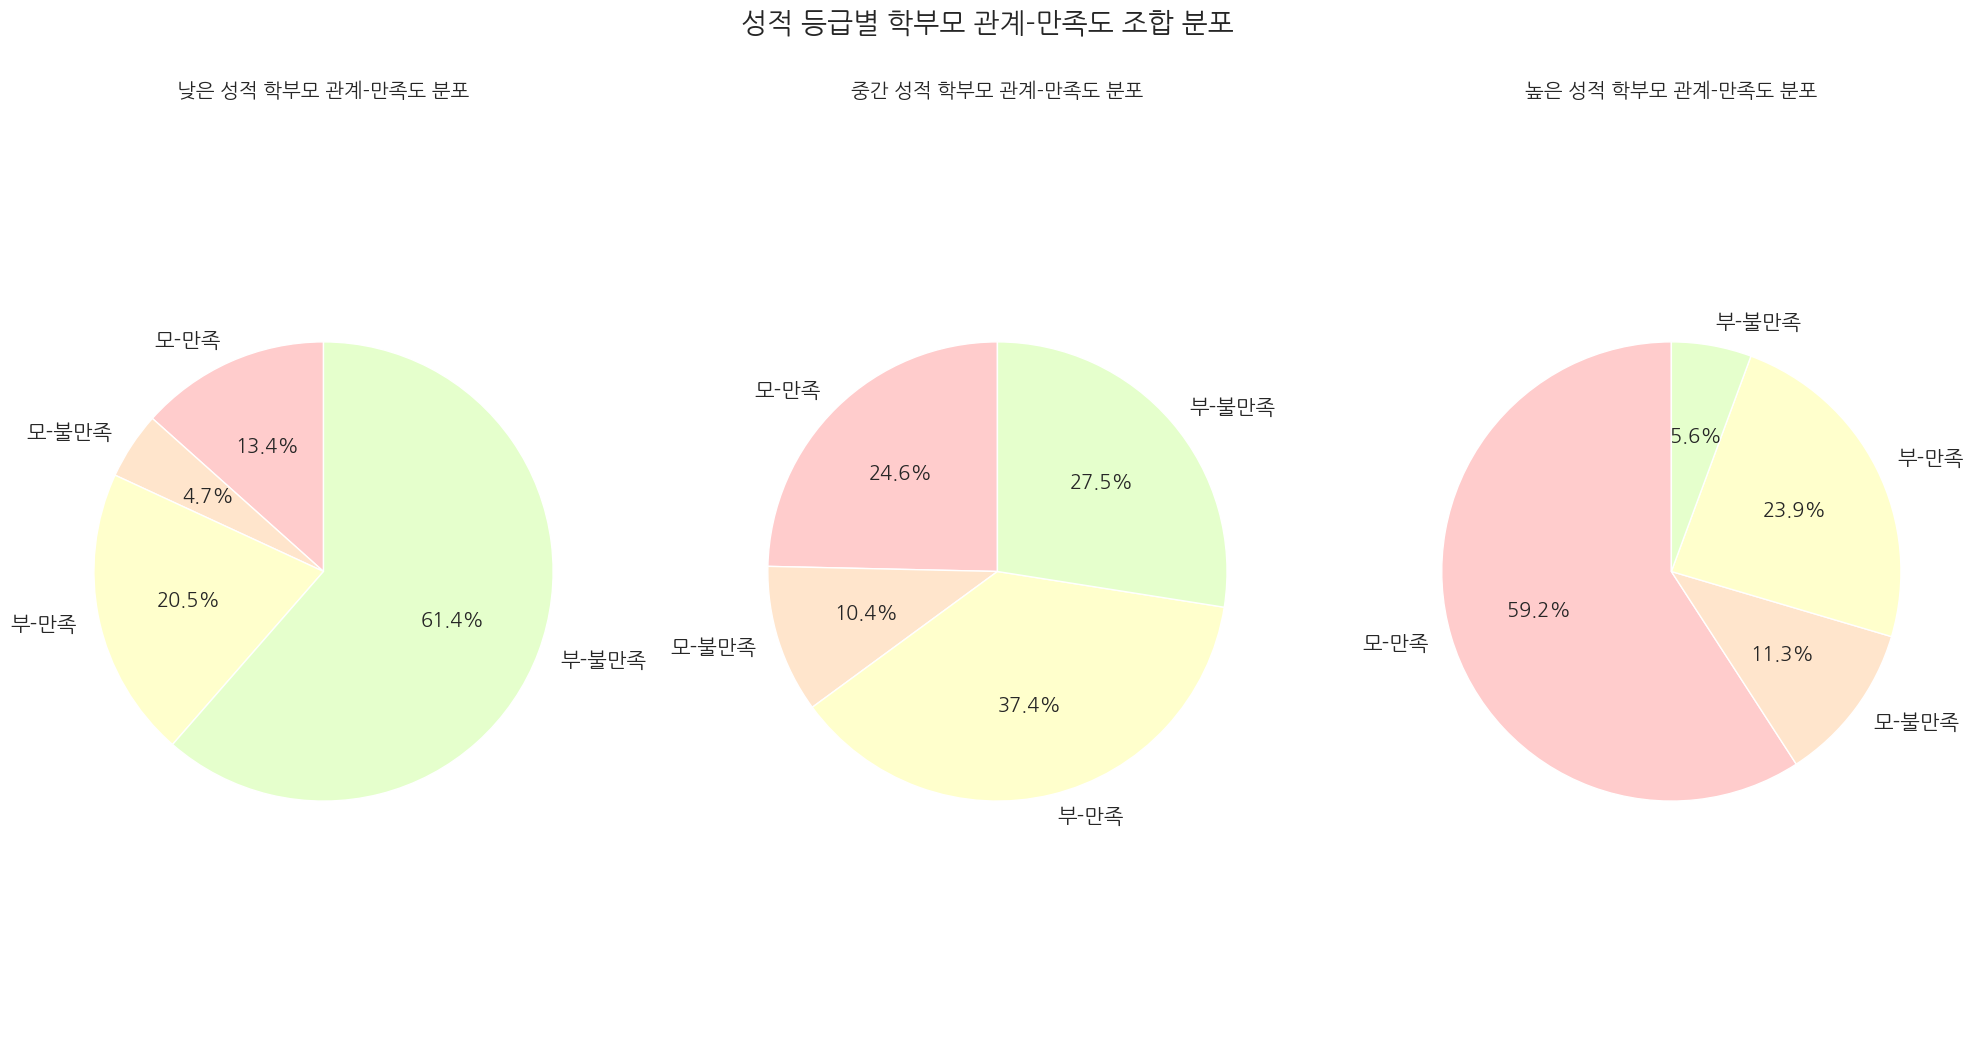

<Figure size 1200x600 with 0 Axes>

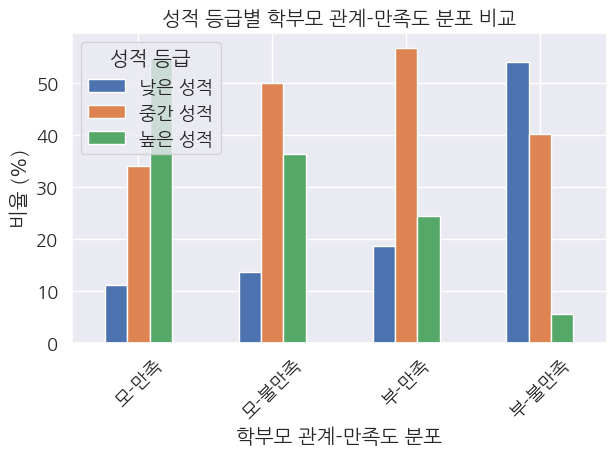

In [ ]:
# 먼저 학부모 관계 답변과 학부모 만족도의 조합을 살펴보고, 각 조합별로 성적 분포 파이차트 생성
class_by_relation_satisfaction = pd.crosstab([edu['Relation'], edu['학부모_만족도']], edu['Class'])
class_by_relation_satisfaction.columns = ['L', 'M', 'H']  # 낮음, 중간, 높음

# 이번에는 반대로 각 성적 그룹별로 학부모 관계 답변-만족도 조합 분포를 보여주는 파이차트 생성
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# 학부모 관계 답변-만족도 조합을 위한 새로운 변수 생성
edu['relation_satisfaction'] = edu['Relation'] + '_' + edu['학부모_만족도']

# 학부모 관계 답변-만족도 조합에 대한 레이블 생성
relation_satisfaction_labels = {
    'Mum_Good': '모-만족',
    'Mum_Bad': '모-불만족',
    'Father_Good': '부-만족',
    'Father_Bad': '부-불만족'
}

# 학부모 관계 답변-만족도 조합 구간화
edu['relation_satisfaction_bin'] = edu['relation_satisfaction'].map(relation_satisfaction_labels)

classes = ['L', 'M', 'H']
class_labels = {'L': '낮은 성적', 'M': '중간 성적', 'H': '높은 성적'}
colors = ['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC']

for i, cls in enumerate(classes):
    class_data = edu[edu['Class'] == cls]

    # 각 성적 그룹 내 학부모 관계 답변-만족도 분포
    value_counts = class_data['relation_satisfaction_bin'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )

    # 텍스트 크기 조정 (레이블이 길 수 있음)
    for text in texts:
        text.set_fontsize(15)

    ax[i].set_title(f"{class_labels[cls]} 학부모 관계-만족도 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('성적 등급별 학부모 관계-만족도 조합 분포', fontsize=20, y=1.05)
plt.savefig('class_by_relation_satisfaction_piechart.png', dpi=300, bbox_inches='tight')
plt.show()

# 막대 그래프로 비교하기
plt.figure(figsize=(12, 6))
relation_class_crosstab = pd.crosstab(edu['relation_satisfaction_bin'], edu['Class'], normalize='index') * 100
relation_class_crosstab = relation_class_crosstab[['L', 'M', 'H']]  # 열 순서 (L, M , H 순으로)
relation_class_crosstab.plot(kind='bar', stacked=False)
plt.title('성적 등급별 학부모 관계-만족도 분포 비교')
plt.xlabel('학부모 관계-만족도 분포')
plt.ylabel('비율 (%)')
plt.legend(title='성적 등급', labels=class_labels.values())
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_by_relation_satisfaction_barplot.png', dpi=300)
plt.show()

# 학부모의 설문조사 답변 및 학부모 만족도의 조합

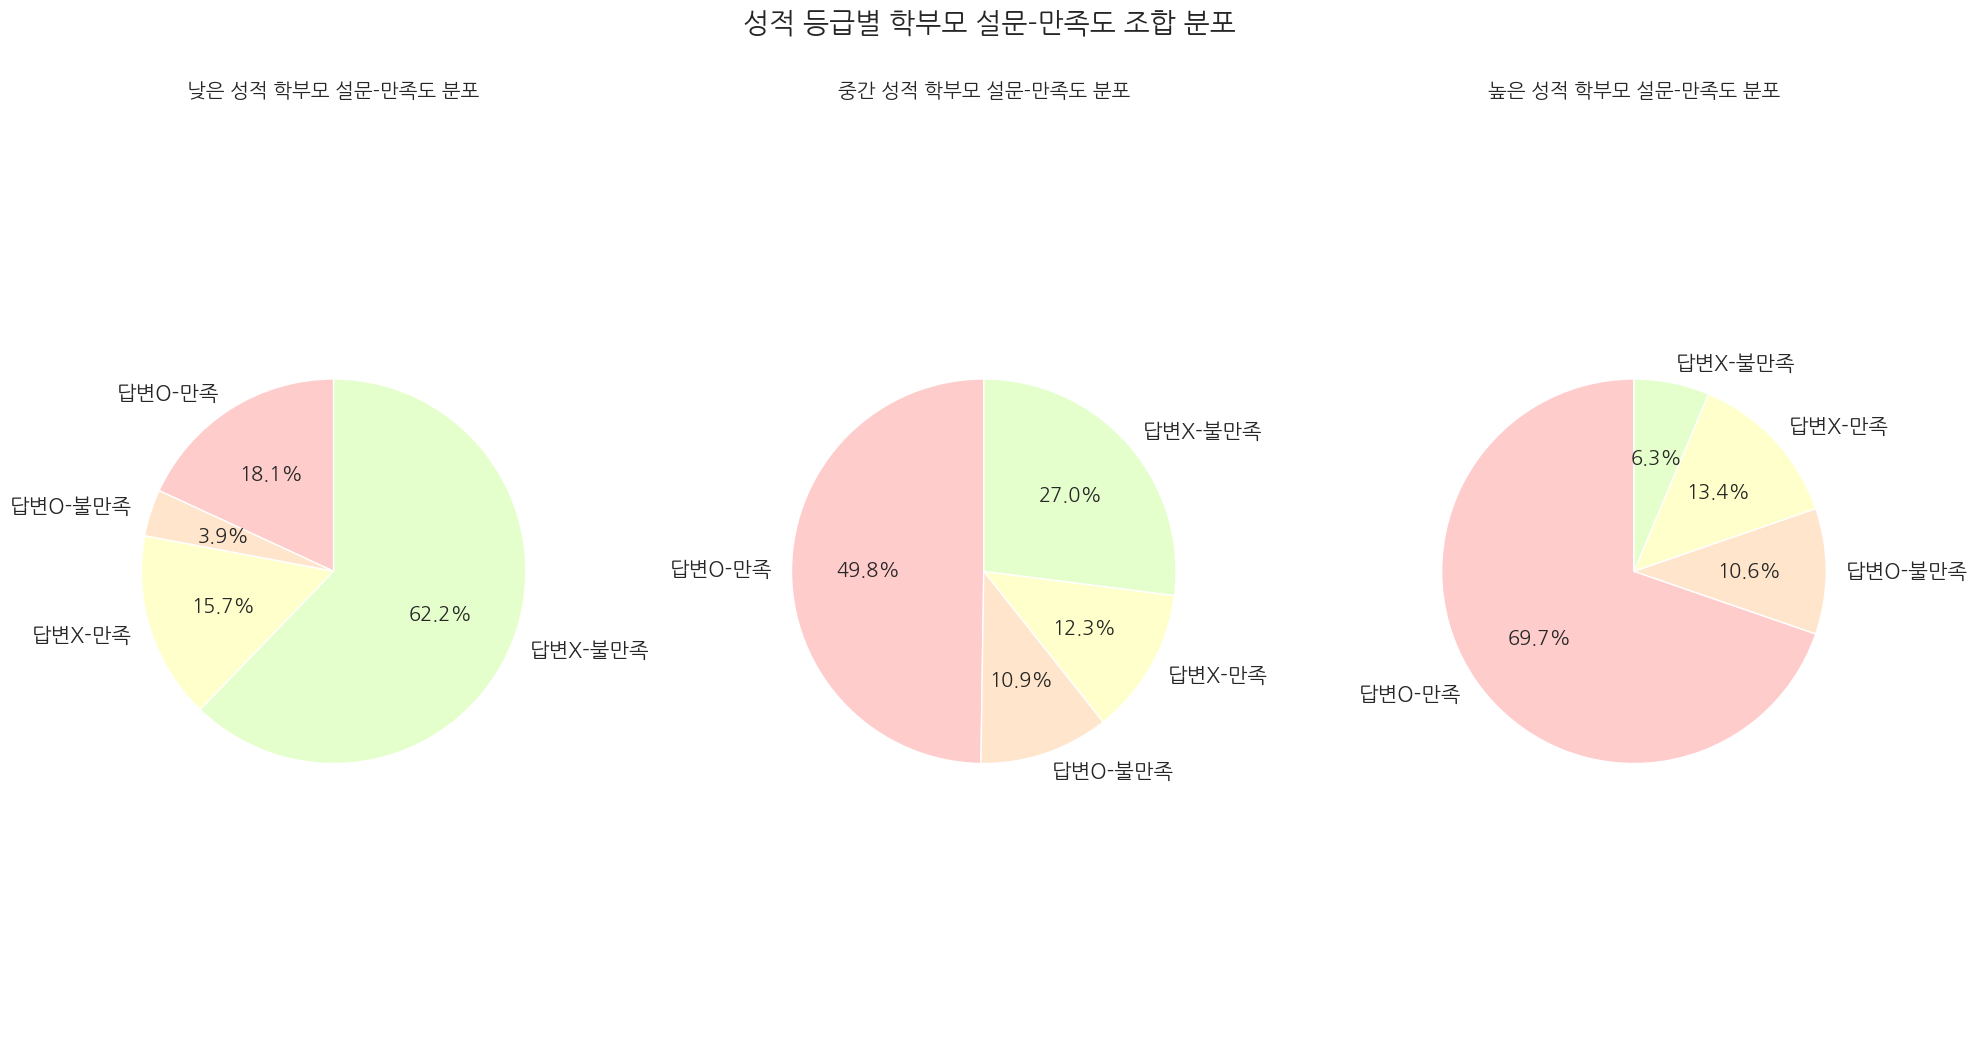

<Figure size 1200x600 with 0 Axes>

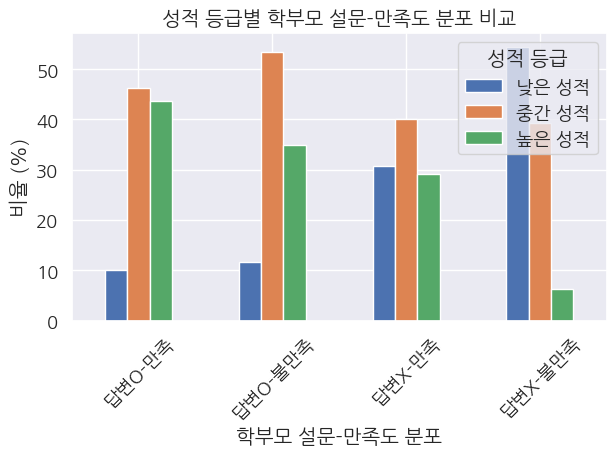

In [ ]:
# 먼저 학부모 설문 답변과 학부모 만족도의 조합을 살펴보고, 각 조합별로 성적 분포 파이차트 생성
class_by_survey_satisfaction = pd.crosstab([edu['학부모_설문답변'], edu['학부모_만족도']], edu['Class'])
class_by_survey_satisfaction.columns = ['L', 'M', 'H']  # 낮음, 중간, 높음

# 이번에는 반대로 각 성적 그룹별로 학부모 설문 답변-만족도 조합 분포를 보여주는 파이차트 생성
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# 학부모 설문 답변-만족도 조합을 위한 새로운 변수 생성
edu['survey_satisfaction'] = edu['학부모_설문답변'] + '_' + edu['학부모_만족도']

# 학부모 설문 답변-만족도 조합에 대한 레이블 생성
survey_satisfaction_labels = {
    'Yes_Good': '답변O-만족',
    'Yes_Bad': '답변O-불만족',
    'No_Good': '답변X-만족',
    'No_Bad': '답변X-불만족'
}

# 학부모 설문 답변-만족도 조합 구간화
edu['survey_satisfaction_bin'] = edu['survey_satisfaction'].map(survey_satisfaction_labels)

classes = ['L', 'M', 'H']
class_labels = {'L': '낮은 성적', 'M': '중간 성적', 'H': '높은 성적'}
colors = ['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC']

for i, cls in enumerate(classes):
    class_data = edu[edu['Class'] == cls]

    # 각 성적 그룹 내 학부모 설문 답변-만족도 분포
    value_counts = class_data['survey_satisfaction_bin'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )

    # 텍스트 크기 조정 (레이블이 길 수 있음)
    for text in texts:
        text.set_fontsize(15)

    ax[i].set_title(f"{class_labels[cls]} 학부모 설문-만족도 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('성적 등급별 학부모 설문-만족도 조합 분포', fontsize=20, y=1.05)
plt.savefig('class_by_survey_satisfaction_piechart.png', dpi=300, bbox_inches='tight')
plt.show()

# 막대 그래프로 비교하기
plt.figure(figsize=(12, 6))
survey_satisfaction_class_crosstab = pd.crosstab(edu['survey_satisfaction_bin'], edu['Class'], normalize='index') * 100
survey_satisfaction_class_crosstab = survey_satisfaction_class_crosstab[['L', 'M', 'H']]  # 열 순서 (L, M , H 순으로)
survey_satisfaction_class_crosstab.plot(kind='bar', stacked=False)
plt.title('성적 등급별 학부모 설문-만족도 분포 비교')
plt.xlabel('학부모 설문-만족도 분포')
plt.ylabel('비율 (%)')
plt.legend(title='성적 등급', labels=class_labels.values())
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_by_survey_satisfaction_barplot.png', dpi=300)
plt.show()

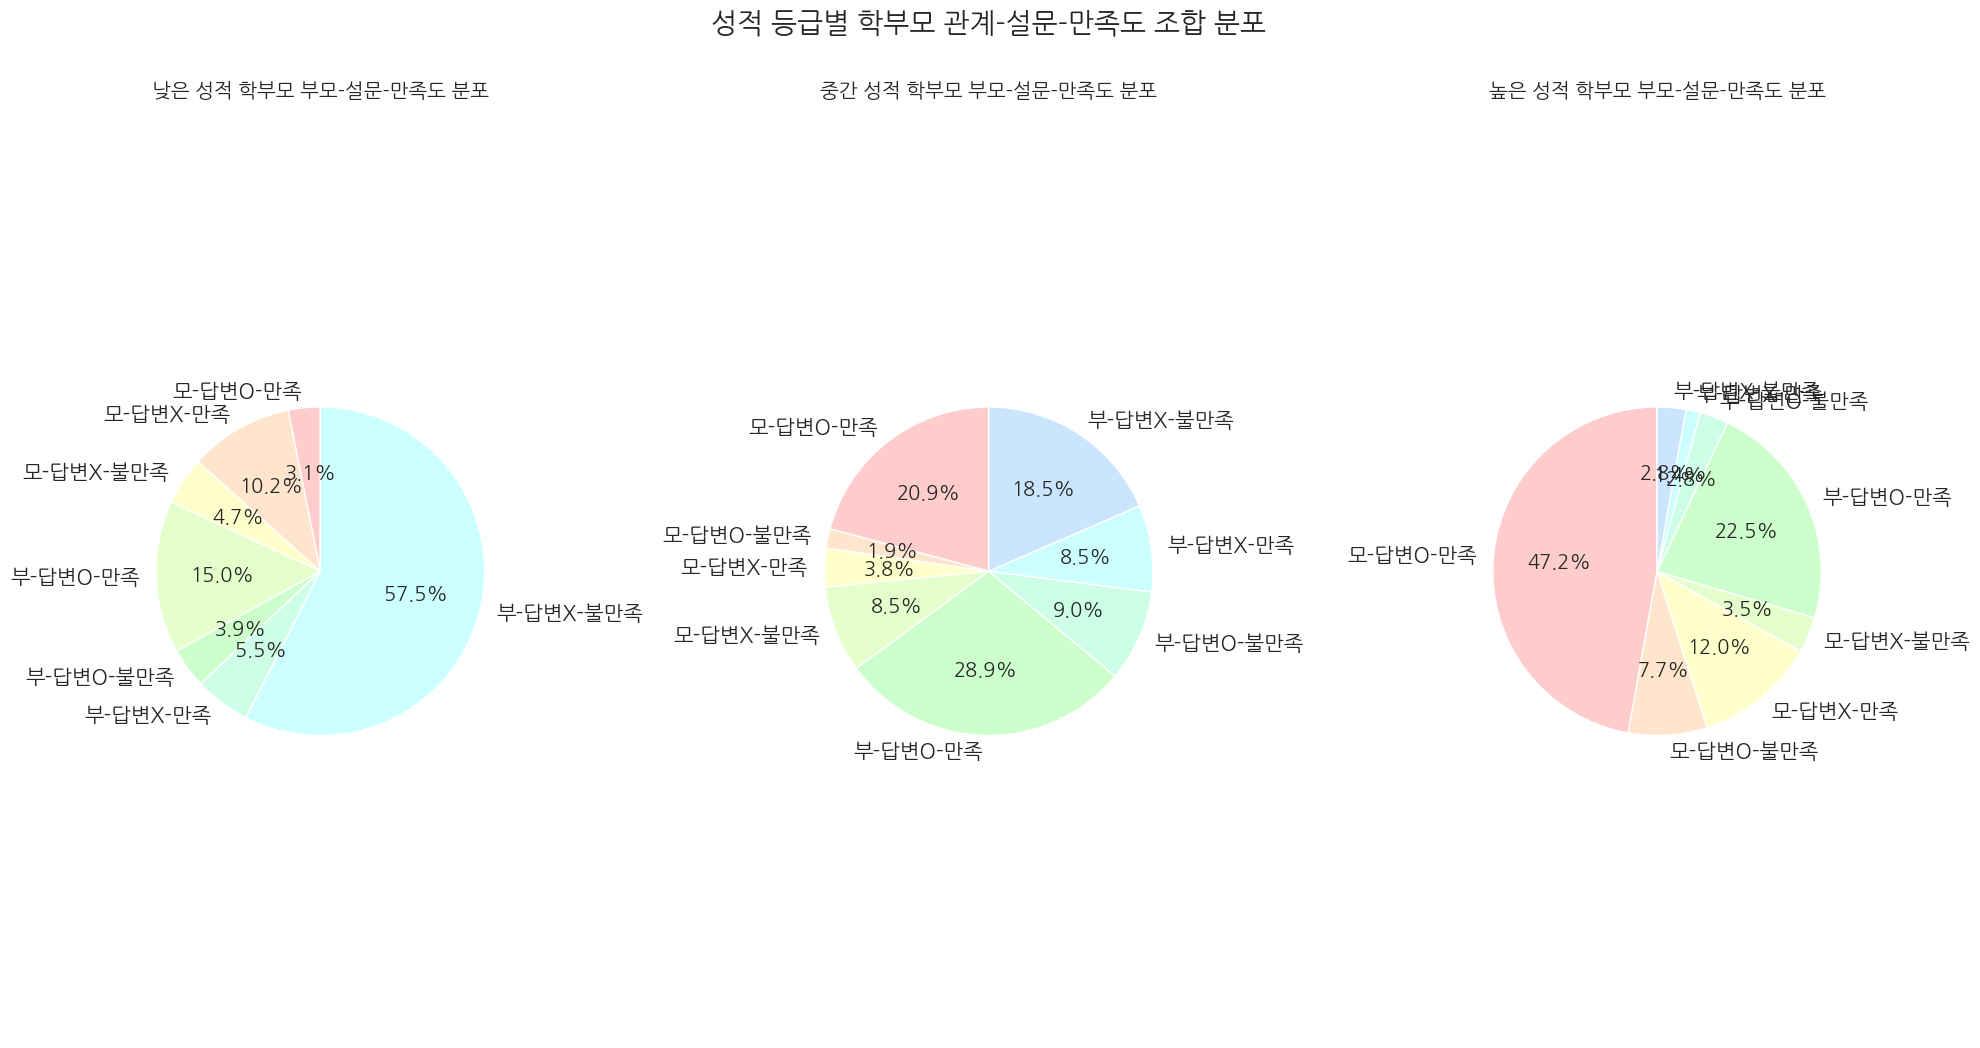

<Figure size 1200x600 with 0 Axes>

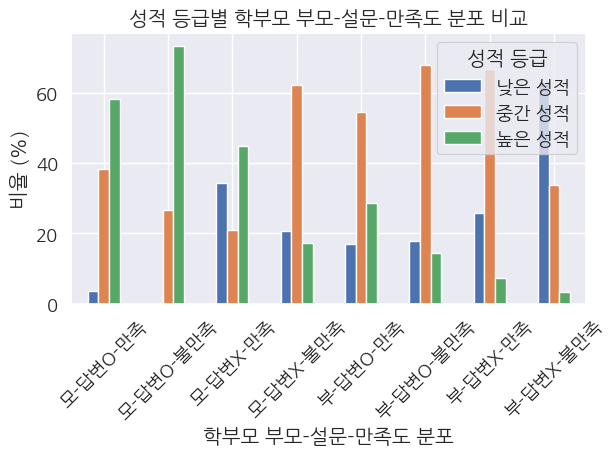

In [ ]:
# 먼저 학부모 설문 답변과 학부모 만족도의 조합을 살펴보고, 각 조합별로 성적 분포 파이차트 생성
class_by_relation_survey_satisfaction = pd.crosstab([edu['Relation'], edu['학부모_설문답변'], edu['학부모_만족도']], edu['Class'])
class_by_relation_survey_satisfaction.columns = ['L', 'M', 'H']  # 낮음, 중간, 높음

# 이번에는 반대로 각 성적 그룹별로 학부모 부모-설문 답변-만족도 조합 분포를 보여주는 파이차트 생성
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# 학부모 부모-설문 답변-만족도 조합을 위한 새로운 변수 생성
edu['relation_survey_satisfaction'] = edu['Relation'] + '_' + edu['학부모_설문답변'] + '_' + edu['학부모_만족도']

# 학부모 부모-설문 답변-만족도 조합에 대한 레이블 생성
relation_survey_satisfaction_labels = {
    'Mum_Yes_Good': '모-답변O-만족',
    'Mum_Yes_Bad': '모-답변O-불만족',
    'Mum_No_Good': '모-답변X-만족',
    'Mum_No_Bad': '모-답변X-불만족',
    'Father_Yes_Good': '부-답변O-만족',
    'Father_Yes_Bad': '부-답변O-불만족',
    'Father_No_Good': '부-답변X-만족',
    'Father_No_Bad': '부-답변X-불만족'
}

# 학부모 부모-설문 답변-만족도 조합 구간화
edu['relation_survey_satisfaction_bin'] = edu['relation_survey_satisfaction'].map(relation_survey_satisfaction_labels)

classes = ['L', 'M', 'H']
class_labels = {'L': '낮은 성적', 'M': '중간 성적', 'H': '높은 성적'}
colors = [
  '#FFCCCC',  # 연한 분홍색
  '#FFE5CC',  # 연한 살구색
  '#FFFFCC',  # 연한 노란색
  '#E5FFCC',  # 연한 라임색
  '#CCFFCC',  # 연한 민트색
  '#CCFFE5',  # 연한 청록색
  '#CCFFFF',  # 연한 하늘색
  '#CCE5FF',  # 연한 파란색
]

for i, cls in enumerate(classes):
    class_data = edu[edu['Class'] == cls]

    # 각 성적 그룹 내 학부모 부모-설문 답변-만족도 분포
    value_counts = class_data['relation_survey_satisfaction_bin'].value_counts().sort_index()

    wedges, texts, autotexts = ax[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )

    # 텍스트 크기 조정 (레이블이 길 수 있음)
    for text in texts:
        text.set_fontsize(15)

    ax[i].set_title(f"{class_labels[cls]} 학부모 부모-설문-만족도 분포")
    ax[i].axis('equal')

plt.tight_layout()
plt.suptitle('성적 등급별 학부모 관계-설문-만족도 조합 분포', fontsize=20, y=1.05)
plt.savefig('class_by_relation_survey_satisfaction_piechart.png', dpi=300, bbox_inches='tight')
plt.show()

# 막대 그래프로 비교하기
plt.figure(figsize=(12, 6))
relation_survey_satisfaction_class_crosstab = pd.crosstab(edu['relation_survey_satisfaction_bin'], edu['Class'], normalize='index') * 100
relation_survey_satisfaction_class_crosstab = relation_survey_satisfaction_class_crosstab[['L', 'M', 'H']]  # 열 순서 (L, M , H 순으로)
relation_survey_satisfaction_class_crosstab.plot(kind='bar', stacked=False)
plt.title('성적 등급별 학부모 부모-설문-만족도 분포 비교')
plt.xlabel('학부모 부모-설문-만족도 분포')
plt.ylabel('비율 (%)')
plt.legend(title='성적 등급', labels=class_labels.values())
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_by_relation_survey_satisfaction_barplot.png', dpi=300)
plt.show()

## 최종 가설 : 인터넷 접근성, 부모의 재정 상태, 부모의 교육 관심도(특히 모) 등 가정 환경이 좋을 수록 성적이 좋아지는 것을 알 수 있다.
- grading['인터넷_가능여부]
- grading['부모_재정]
- edu['콘텐츠_방문]
- edu['부모_설문']
- edu['부모_만족도']

## 향후 과제
### 인터넷이 없는 저소득층 가정 학생들에게 디지털 장비 + 인터넷 접근성을 제공하는 정책이 필요할 것이다.
### 또한, 저소득층 가정 부모들의 교육 참여를 높이기 위한 맞춤형 상담을 진행한다.